## PDF Page Rotation Angle Detection Task

Objective:
Implement the `determine_rotation_angle` function within the given code structure to detect the rotation angle of each page in a PDF file.

Code Structure:
The main function `rotate_all_pages_upright` is already implemented, but if necessary you are allowed to change its implementation. Your task is to complete the `determine_rotation_angle` function.

Input:
- A PDF file path (the function should be able to handle various PDF files)

Output:
- A list of integers, where each integer represents the rotation angle needed for a page in the PDF

Rotation Angle:
- The rotation angle should be in degrees, normalized to the range [0, 359].
- 0 means the page is already upright
- 90 means the page needs to be rotated 90 degrees clockwise to be upright
- and so on...

Task:
1. Implement the `determine_rotation_angle` function:
   - Input: A single page object (PdfReader.PageObject)
   - Output: An integer representing the rotation angle in degrees

2. The function should analyze the content of the page and determine the angle needed to make the page upright.

Requirements:
1. The function should work with different PDF files, not just a specific one.
2. Implement robust methods to determine the correct rotation angle.
3. Handle potential exceptions or edge cases (e.g., pages with mixed orientations, complex layouts).
4. Optimize for both accuracy and processing speed, as the function will be called for each page in the PDF.

Additional Considerations:
- You are allowed to use up to 40GB of GPU VRAM if necessary for your implementation.
- You may create as many additional functions as needed to support your implementation.
- You may use additional libraries if required, but ensure they are imported properly.
- Provide clear comments in your code to explain your rotation detection logic.

Testing:
- Test your implementation with various types of PDFs to ensure its robustness and generalizability.
- The main script provides a way to test your implementation on a file named "grouped_documents.pdf".

Note:
The task involves determining the rotation angle only. The actual rotation of the pages is not required in this implementation.

In [5]:
from typing import List
from PyPDF2 import PdfReader, PdfWriter
import io
import numpy as np
from pdf2image import convert_from_path, convert_from_bytes

def rotate_all_pages_upright(input_pdf: str) -> List[int]:
    """
    Analyze all pages in the input PDF and determine the rotation angle needed for each page.

    Args:
    input_pdf (str): The file path of the input PDF.

    Returns:
    List[int]: A list of rotation angles (in degrees) for each page. 
               The angles are normalized to be in the range [0, 359].
               0 means no rotation needed, 90 means 90 degrees clockwise, etc.
    """
    reader = PdfReader(input_pdf)
    writer = PdfWriter()
    
    angles = []
    for page_number in range(len(reader.pages)):
        current_page = reader.pages[page_number]
        
        rotation_angle = determine_rotation_angle(current_page)
        angles.append(rotation_angle)
    
    return angles

def determine_rotation_angle(page: 'PdfReader.PageObject') -> int:
    """
    Determine the rotation angle needed to make the page upright.

    Args:
    page (PdfReader.PageObject): A single page from a PDF.

    Returns:
    int:  The rotation angle in degrees (e.g. 0, 90, 210).
          The rotation angle is  normalized to be in the range [0, 359].
          0 means the page is already upright, 90 means 90 degrees clockwise, etc.
    """
    # Approach Tesseract
    #image = convert_from_path('example.pdf')
    # TODO: Implement the logic to determine the rotation angle of the pdf page
    return 0

# Usage
input_pdf: str = "grouped_documents.pdf"
rotation_angles: List[int] = rotate_all_pages_upright(input_pdf)
print(f"Rotation angles for each page: {rotation_angles}")

Rotation angles for each page: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [20]:
# Install pip packages in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pdf2image
!{sys.executable} -m pip install pytesseract
!{sys.executable} -m pip install cv2

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [294]:
from PIL import Image
import pytesseract # install tessearct Library for OCR, 
pytesseract.pytesseract.tesseract_cmd = r"C:\\Program Files\\Tesseract-OCR\\tesseract.exe"

In [10]:
"""
Convert PDf to image for better processing
"""
from pdf2image import convert_from_path # cave: Install Toddler first, Conda https://stackoverflow.com/questions/46184239/extract-a-page-from-a-pdf-as-a-jpeg

pdf_images = convert_from_path('grouped_documents.pdf')
pdf_images[1].show()
analyzePicture(pdf_images[1])
#for idx in range(len(pdf_images)):
#    pdf_images[idx].save('pictures\pdf_page_'+ str(idx+1) +'.png', 'PNG') 
#    analyzePicture(pdf_images[idx])
print("Successfully converted PDF to images")




Die Dimension ist1700 2200
{'level': [1, 2, 3, 4, 5, 4, 5, 4, 5, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 3, 4, 5, 2, 3, 4, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2], 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 0, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 0, 1, 1, 0, 0, 1, 1], 'word_num': [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1], 'left': [0, 103, 371, 446, 446, 414, 414, 392, 392, 371, 371, 347, 347, 347, 321, 321, 321, 292, 292, 292, 129, 267, 267, 247, 247, 224

In [303]:
#https://stackoverflow.com/questions/28816046/
#displaying-different-images-with-actual-size-in-matplotlib-subplot
"""
Function to show images inline in Jupyter Lab
"""
def display(image):
    im_path = "tempImage.jpg"
    cv2.imwrite("tempImage.jpg", image)
    
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

In [527]:
#Quelle Chat GPT
import numpy as np

def sort_points(points):
    """
    Sortiert die vier Eckpunkte eines Vierecks so, dass sie in einer konsistenten Reihenfolge (Uhrzeigersinn) vorliegen.
    """
    # Berechne den Mittelpunkt des Vierecks
    center = np.mean(points, axis=0)

    # Sortiere die Punkte nach ihrem Winkel relativ zum Mittelpunkt
    def angle_from_center(point):
        return np.arctan2(point[1] - center[1], point[0] - center[0])

    points_sorted = sorted(points, key=angle_from_center)
    return np.array(points_sorted)

def calculate_quadrilateral_area(points):
    """
    Berechnet den Flächeninhalt eines Vierecks, gegeben durch 4 Punkte, unabhängig von der Reihenfolge der Punkte.

    :param points: Ein 2D-Array oder eine Liste mit den 4 Punkten, die die Ecken des Vierecks darstellen.
                   z.B. [[x1, y1], [x2, y2], [x3, y3], [x4, y4]]
    :return: Der Flächeninhalt des Vierecks.
    """
    # Sortiere die Punkte, um eine konsistente Reihenfolge zu gewährleisten
    points_sorted = sort_points(points)

    # Shoelace-Formel zur Berechnung des Flächeninhalts eines Vierecks
    x = points_sorted[:, 0]
    y = points_sorted[:, 1]

    # Berechne den Flächeninhalt
    area = 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))
    return area
def shorten_array(arr):
    """
    Kürzt Python-Arrays, indem äußere Listen, die nur ein Element enthalten, entfernt werden.
    Funktioniert rekursiv auch bei mehrdimensionalen Arrays.
    
    :param arr: Ein verschachteltes Array oder Liste.
    :return: Ein gekürztes Array, in dem unnötige äußere Listen entfernt wurden.
    """
    # Wenn das Array eine Liste ist und nur ein Element hat, dieses Element zurückgeben
    while isinstance(arr, list) and len(arr) == 1:
        arr = arr[0]

    # Falls das Array eine Liste ist, alle Elemente rekursiv kürzen
    if isinstance(arr, list):
        return [shorten_array(element) for element in arr]
    
    # Wenn es kein Array ist, einfach zurückgeben
    return arr

Eckpunkte der Page: [[ 869    0]
 [1697  844]
 [ 828 2195]
 [   0 1351]]


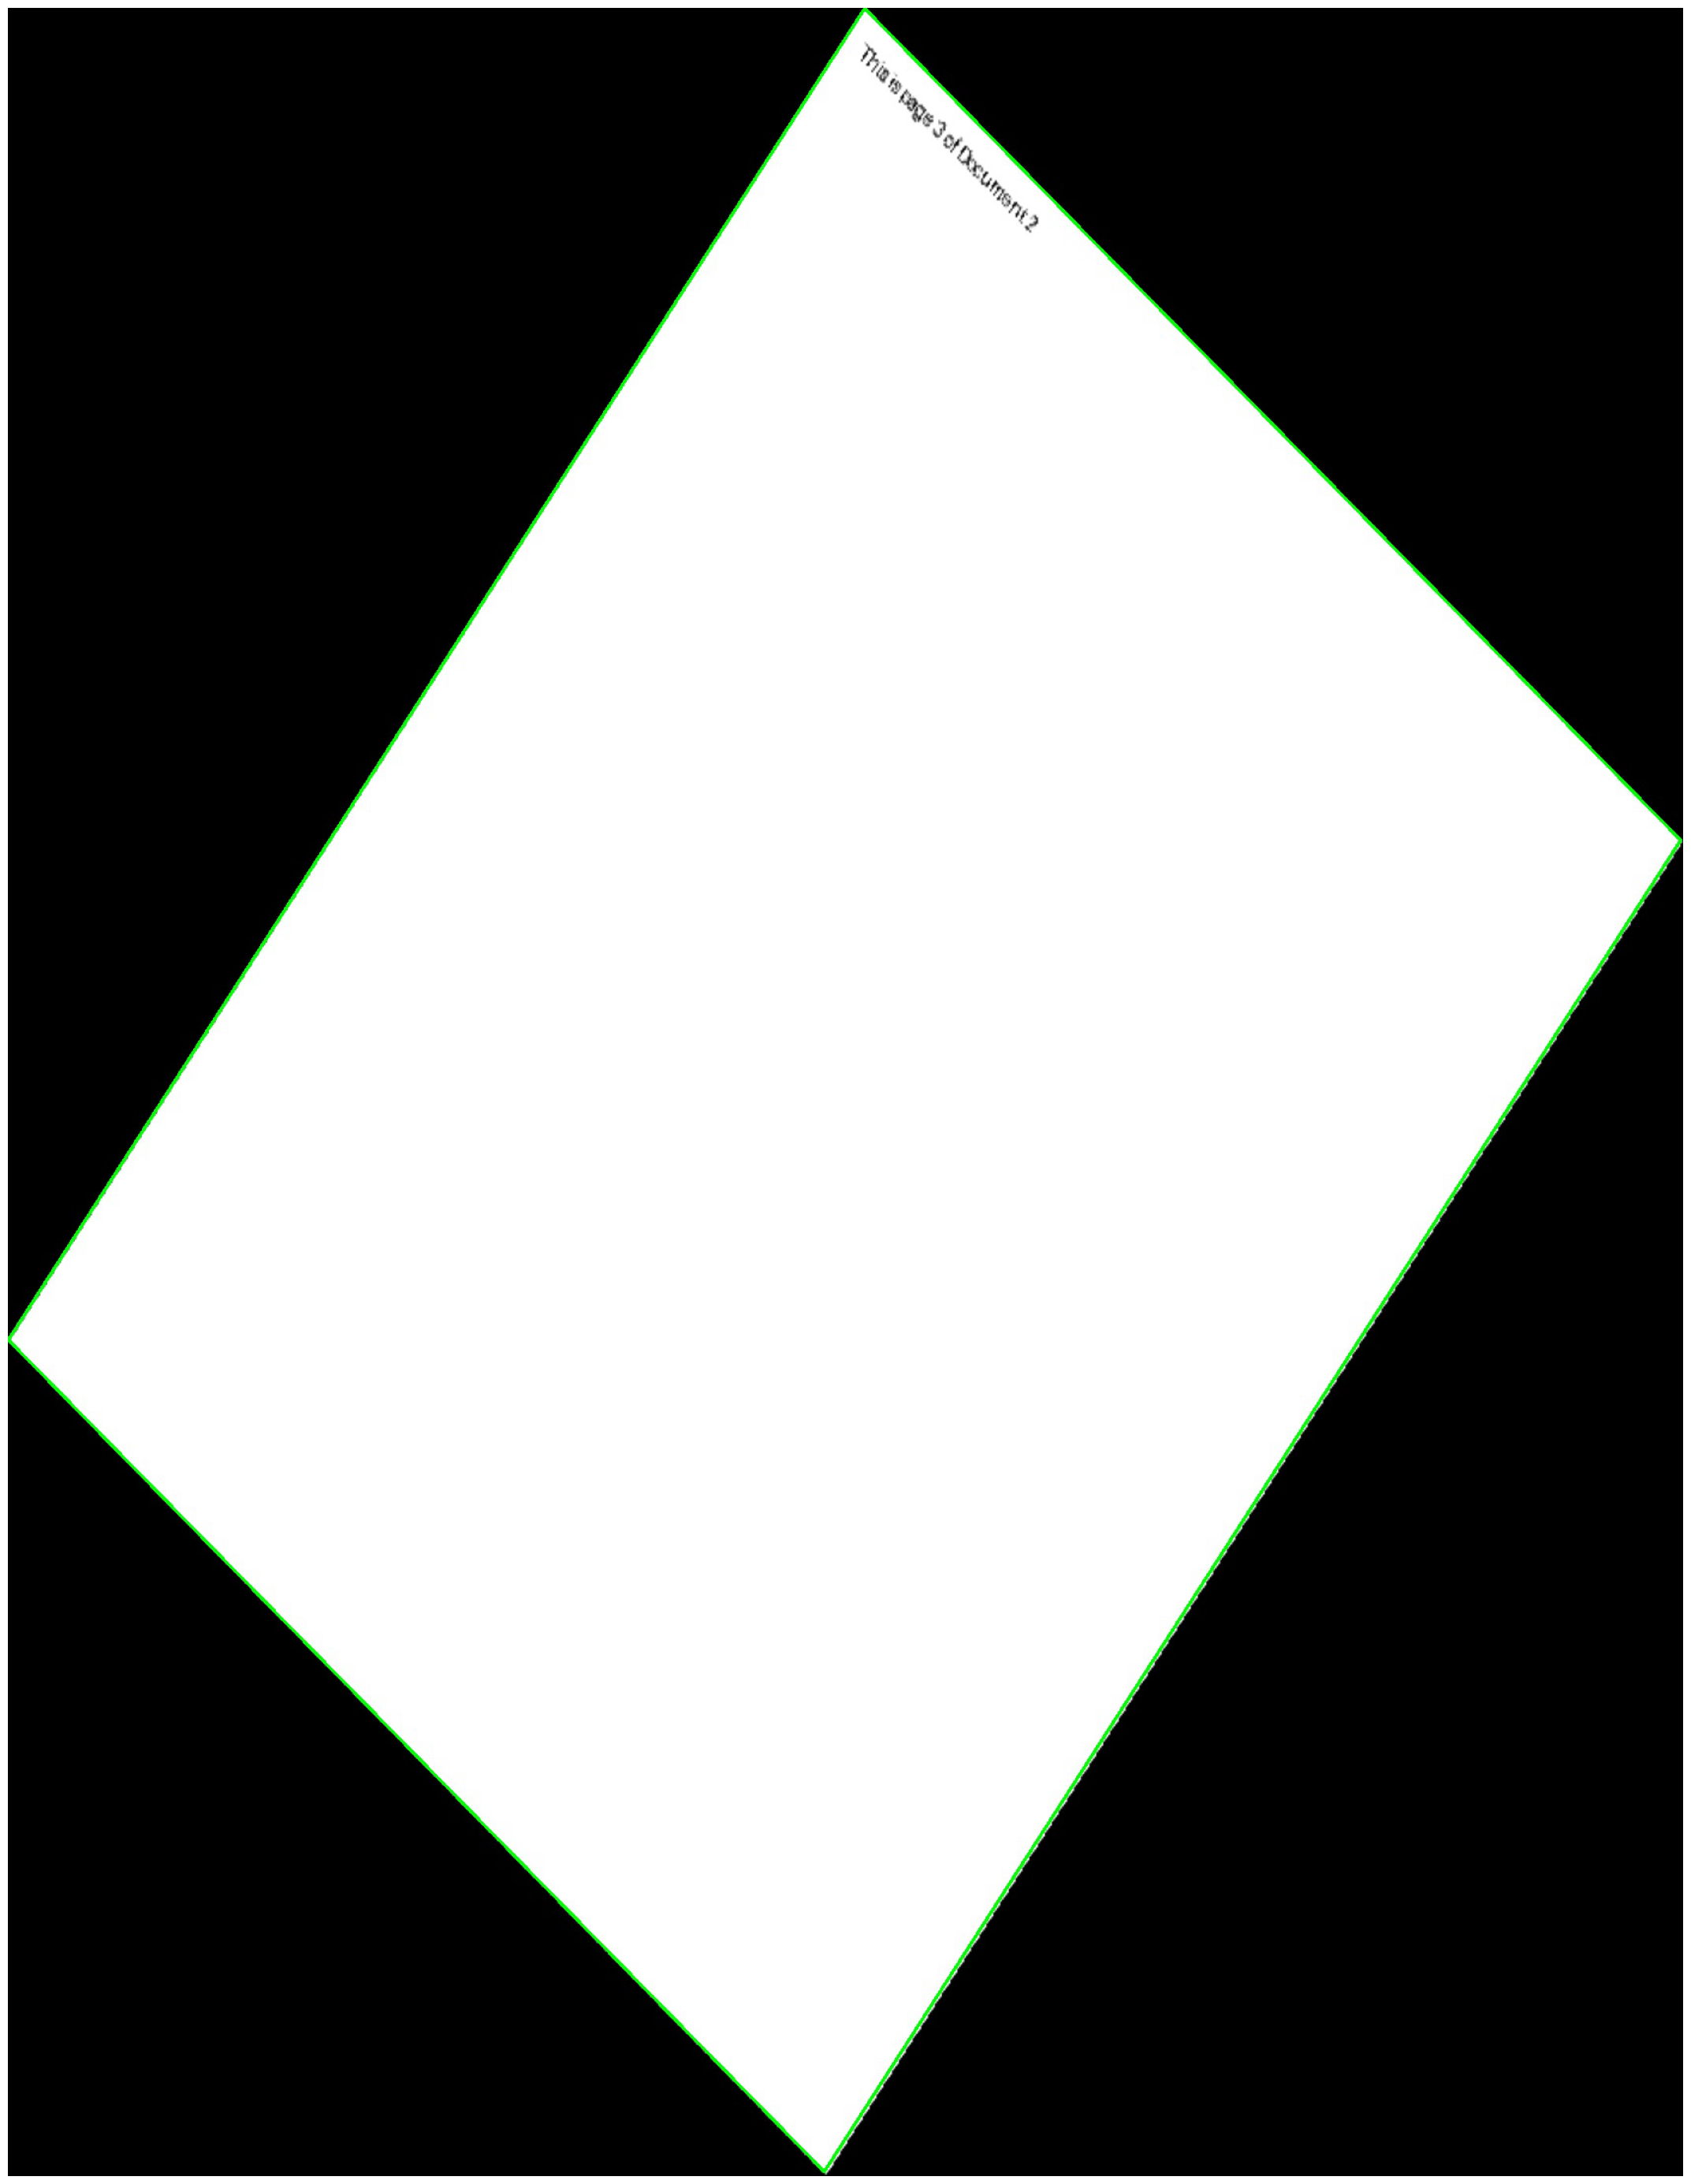

In [575]:
"""
preprocess pictures for angle Detection and OCR
"""
import math
import cv2
from matplotlib import pyplot as plt

i = 18

path = ".\\pictures\\pdf_page_"+str(i)+".png"
img = cv2.imread(path) # Load Image
img_col = img.copy()

#Noise removal does not apply for example document

#Binarization
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

#remove border
contours, heiarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cntsSorted = sorted(contours, key=lambda x:cv2.contourArea(x))
cnt = cntsSorted[-1]
x, y, w, h = cv2.boundingRect(cnt)
img = img[y:y+h, x:x+w]


"""
Find outer Contours.
With the Border of the pages, every Page is at first turned upwards
"""
contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

boxes = []
for contour in contours:
    # Verwende cv2.minAreaRect, um das kleinste umschließende Rechteck zu finden
    #rect = cv2.minAreaRect(contour)
    epsilon = 0.02 * cv2.arcLength(contour, True)
    rect = cv2.approxPolyDP(contour, epsilon, True)
    
    if (len(rect) == 4): # Teste auf 4Eck
        rect = np.squeeze(rect)
        boxes.append(rect)
        # Hol dir die vier Eckpunkte dieses Rechtecks
        #box = cv2.boxPoints(rect)
        #box = np.intp(box)  # Konvertiere die Koordinaten in Ganzzahlen
        #boxes.append(box)
    

#Choose rectangle with greatest Area
maxArea = 0
paperBorder = None
for box in boxes:
    #print ("shortend Array is jaja...")
    shortend = shorten_array(box)
    #print (shortend)
    area = calculate_area(shortend)
    if (area > maxArea):
        maxArea = area
        paperBorder = box
paperBorder = sort_points(paperBorder)
print("Eckpunkte der Page:", paperBorder)

cv2.drawContours(img_col, [paperBorder], 0, (0, 255, 0), 2) # show Bordes of page



#crop header and footer
#img = img [0:2000, 0:2000]
"""#img = rotateImage(img, -20)

#img = rotateImage(img, -11.87)


#angle = getSkewAngle(img)
#print ("Der Winkel ist " + str(angle))
#img = rotateImage (img, -1 * angle - 90)

#print (pytesseract.image_to_osd(img, output_type='dict'))
h, w = img.shape
boxes = pytesseract.image_to_boxes(img)
print (boxes)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

"""


display(img_col)
#cv2.imshow('img', im_bw)
#cv2.waitKey(0)



In [324]:
# Test Tesseact with different cases
im = cv2.imread(".\\TesseractTesting\\test1.PNG")
try:
    osd = pytesseract.image_to_osd(im, output_type='dict')
    print(osd)
    if (osd['orientation_conf'] > 3):
        im = rotateImage(im, -1* osd['rotate'])
        display(im)
    else:
        print ("Tesseract konnte Winkel nicht sicher erkennen")
except:
    print ("Tesseract akzeptiert Eingabedatei nicht")
    



Tesseract akzeptiert Eingabedatei nicht


In [3]:
import cv2

for i in range (1, 19):
    print (i)
    img = cv2.imread(".\\pictures\\pdf_page_"+str(i)+".png")
    h, w, c = img.shape
    #print (c)
    boxes = pytesseract.image_to_boxes(img) 
    for b in boxes.splitlines():
        b = b.split(' ')
        img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
        
    print ("before saving")
    cv2.imwrite(".\\Boxes\\box"+str(i)+".png", img)
    print ("after saving")
    #cv2.imshow('img', img)
    #cv2.waitKey(0)

1
before saving
after saving
2
before saving
after saving
3
before saving
after saving
4
before saving
after saving
5
before saving
after saving
6
before saving
after saving
7
before saving
after saving
8
before saving
after saving
9
before saving
after saving
10
before saving
after saving
11
before saving
after saving
12
before saving
after saving
13
before saving
after saving
14
before saving
after saving
15
before saving
after saving
16
before saving
after saving
17
before saving
after saving
18
before saving
after saving


In [5]:
im = Image.open(".\\TesseractTesting\\test3Black.PNG")
osd = pytesseract.image_to_boxes(im)
print(osd)

In [14]:
img = cv2.imread(".\\TesseractTesting\\test1.PNG")
h, w, c = img.shape
#print (c)
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

print (boxes)
cv2.imshow('img', img)
cv2.waitKey(0)

T 125 147 147 177 0
h 142 147 160 182 0
i 149 151 179 182 0
s 181 157 199 178 0
i 209 163 218 190 0
s 219 164 237 185 0
p 249 162 268 192 0
a 270 174 290 196 0
g 291 171 311 200 0
e 312 182 331 204 0
3 343 189 363 218 0
, 356 189 363 218 0
o 376 195 395 217 0
f 395 199 405 228 0
D 418 203 443 232 0
o 446 208 465 230 0
c 467 212 485 234 0
u 486 216 505 238 0
m 508 220 538 244 0
e 539 227 558 249 0
n 561 231 580 253 0
t 580 235 593 261 0
5 604 239 622 268 0



-1

In [301]:
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()
    blur = cv2.GaussianBlur(newImage, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=2)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    for c in contours:
        rect = cv2.boundingRect(c)
        x,y,w,h = rect
        cv2.rectangle(newImage,(x,y),(x+w,y+h),(0,255,0),2)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    print (len(contours))
    minAreaRect = cv2.minAreaRect(largestContour)
    cv2.imwrite("temp/boxes.jpg", newImage)
    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle


In [234]:
#https://becominghuman.ai/how-to-automatically-deskew-straighten-a-text-image-using-opencv-a0c30aed83df
import numpy as np

def getSkewAngle(cvImage) -> float:
    print ("hello World
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=2)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    for c in contours:
        rect = cv2.boundingRect(c)
        x,y,w,h = rect
        cv2.rectangle(newImage,(x,y),(x+w,y+h),(0,255,0),2)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    print (len(contours))
    minAreaRect = cv2.minAreaRect(largestContour)
    cv2.imwrite(".//temp/boxes.jpg", newImage)
    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle
# Rotate the image around its center
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

SyntaxError: unterminated string literal (detected at line 5) (823137519.py, line 5)

In [83]:
# Deskew image
def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    return rotateImage(cvImage, -1.0 * angle)

hello World
1
{'level': [1, 2, 3, 4, 5, 5, 5, 5, 5, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1, 1, 1, 1, 1, 1], 'word_num': [0, 0, 0, 0, 1, 2, 3, 4, 5, 6], 'left': [0, 315, 315, 315, 317, 316, 316, 323, 315, 316], 'top': [0, 0, 0, 0, 0, 120, 166, 199, 296, 334], 'width': [704, 37, 37, 37, 29, 29, 28, 29, 30, 28], 'height': [361, 359, 359, 359, 107, 33, 19, 82, 23, 25], 'conf': [-1, -1, -1, -1, 48, 70, 83, 71, 68, 32], 'text': ['', '', '', '', 'unsoq', 'Jo', '¢', 'ebed', 'sI', 'sI']}


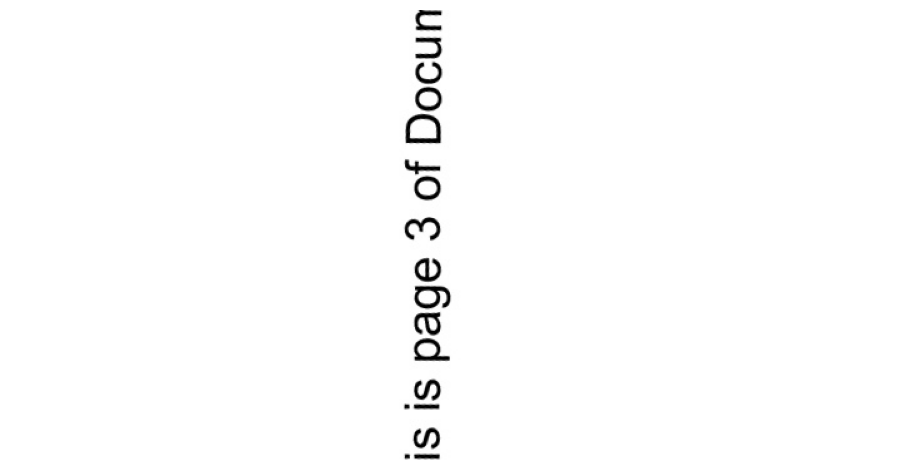

In [154]:
new = cv2.imread(".//TesseractTesting//test1.png")
fixed = deskew(new)
print (pytesseract.image_to_data(fixed, output_type='dict'))
display (fixed)

In [23]:
import cv2

for i in range (1, 19):
    print (i)
    img = cv2.imread(".\\processImages\\img"+str(i)+".png")
    h, w, c = img.shape
    #print (c)
    boxes = pytesseract.image_to_boxes(img) 
    for b in boxes.splitlines():
        b = b.split(' ')
        img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
        
    print ("before saving")
    cv2.imwrite(".\\BoxesAfterProcessing\\box"+str(i)+".png", img)
    print ("after saving")
    #cv2.imshow('img', img)
    #cv2.waitKey(0)

1
before saving
after saving
2
before saving
after saving
3
before saving
after saving
4
before saving
after saving
5
before saving
after saving
6
before saving
after saving
7
before saving
after saving
8
before saving
after saving
9
before saving
after saving
10
before saving
after saving
11
before saving
after saving
12
before saving
after saving
13
before saving
after saving
14
before saving
after saving
15
before saving
after saving
16
before saving
after saving
17
before saving
after saving
18
before saving
after saving
